In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [424]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head(6)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
5,52.0,9,Married-civ-spouse,White,?,45,>50K,NaN,NaN


# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [396]:
# 2- Quais as dimensões do dataframe?

print("O Dataframe df possui",df.ndim,"dimensões, contendo",df.shape[0],"linhas e",df.shape[1],"colunas.")

O Dataframe df possui 2 dimensões, contendo 29170 linhas e 9 colunas.


In [397]:
# 3- Qual o tipo das variáveis?

print("Abaixo estão as variáveis do Dataframe bem como seus respectivos tipos: \n",
      df.dtypes)

Abaixo estão as variáveis do Dataframe bem como seus respectivos tipos: 
 idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object


In [398]:
# 4- Existem variáveis faltantes no dataset? Quais?

for v in df.columns:
    if df[v].isnull().sum() > 0:
        print("A coluna",df[v].name,"possui",df[v].isnull().sum(),"valores faltantes")
    else:
        print("A coluna",df[v].name,"não possui valores faltantes")

A coluna idade possui 99 valores faltantes
A coluna tempo_educacao não possui valores faltantes
A coluna estado_civil não possui valores faltantes
A coluna cor não possui valores faltantes
A coluna sexo não possui valores faltantes
A coluna horas_por_semana não possui valores faltantes
A coluna salario_anual não possui valores faltantes
A coluna nome possui 29170 valores faltantes
A coluna dívida possui 29170 valores faltantes


In [399]:
# 5- Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?
df[["estado_civil","cor","sexo"]].dtypes

estado_civil    object
cor             object
sexo            object
dtype: object

In [400]:
print(df.estado_civil.unique())
print('*****************'*4)
print(df.cor.unique())
print('*****************'*4)
print(df.sexo.unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
********************************************************************
['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']
********************************************************************
['Male' 'Female' '?']


#### A variável sexo não tem valores faltantes, conforme vimos no exercício 4, porém há valores indefinidos com "?" conforme a linha acima. Resolvi então investigar um pouco mais.

In [401]:
print("Há",sum(df.sexo.loc[df.sexo == '?'].value_counts()),"linhas onde a variável sexo contem valores de indefinição.")

Há 1937 linhas onde a variável sexo contem valores de indefinição.


#### Para resolver o problema dos dados com "?", resolvi carregar o Dataframe novamente e substituí-los por NaN

In [402]:
df2 = pd.read_csv("dataframe_exercicio_modulo_7.csv",na_values='?')
df2.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


#### Vamos refazer o exercício 4 e verificar se a variável sexo agora possui valores faltantes:

In [403]:
print("A coluna",df['sexo'].name,"possui",df['sexo'].isnull().sum(),"valores faltantes no primeiro Dataframe")

print('-----------------'*4)
print("A coluna",df2['sexo'].name,"possui",df2['sexo'].isnull().sum(),"valores faltantes no segundo Dataframe")
   

A coluna sexo possui 0 valores faltantes no primeiro Dataframe
--------------------------------------------------------------------
A coluna sexo possui 1937 valores faltantes no segundo Dataframe


In [404]:
# 6- Faça um tratamento nas variáveis faltantes.

var_categorica = []
var_numerica = []

#Classificando automaticamente as colunas em variável e categórica
for v in df2.columns:
    try:
        df2[v].sum()/2 #Se não resultar em um erro, a coluna será do tipo numérica
        var_numerica.append(v)
    
    except TypeError:
        var_categorica.append(v) #Em caso de erro, será do tipo categórica

for v in var_numerica:
    if df2[v].isnull().sum() / df2.shape[0] > 0.8:
        df2 = df2.drop(v,axis=1) #Se o percentual de dados faltantes for acima de 80%, delete.
    else:
         df2[v] = round(df2[v].fillna(df2[v].mean())) #Senão preencha com a média

for v in var_categorica:
    if df2[v].isnull().sum() / df2.shape[0] > 0.8: #Se o percentual de dados faltantes for acima de 80%, delete.
        df2 = df2.drop(v,axis=1)
   
    else:
          df2[v] = df2[v].fillna(df2[v].value_counts().idxmax()) #Senão preencha com a moda
            
print(var_categorica)
print(var_numerica)

['estado_civil', 'cor', 'sexo', 'salario_anual']
['idade', 'tempo_educacao', 'horas_por_semana', 'nome', 'dívida']


In [405]:
print(df2.isnull().sum())

print(df2.sexo.unique())

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64
['Male' 'Female']


In [406]:
#7 - Aplique uma transformação "MinMax" na variável 'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = df2.tempo_educacao.values.reshape(-1,1)
y = df2.horas_por_semana.values.reshape(-1,1)

mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

mm_scaler.fit(x)
ss_scaler.fit(y)

StandardScaler()

In [407]:
tempo_educacao_MinMaxScaler=mm_scaler.transform(x)
horas_por_semana_padrão = ss_scaler.transform(y)

df3 = pd.DataFrame(np.c_[tempo_educacao_MinMaxScaler, horas_por_semana_padrão]).round(4)
df3.rename(columns = {0:"tempo_educacao", 1:"horas_por_semana"}, inplace= True)

df3

,tempo_educacao,horas_por_semana
0,0.8000,-0.0361
1,0.8000,-2.2105
2,0.5333,-0.0361
3,0.4000,-0.0361
4,0.8667,-0.0361
...,...,...
29165,0.7333,-0.1971
29166,0.5333,-0.0361
29167,0.5333,-0.0361
29168,0.5333,-1.6468


In [408]:
#8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [409]:
estado_civil_ohe = df2.estado_civil.values.reshape(-1,1) #Transformando a coluna cidade para um array
ohe.fit(estado_civil_ohe)
ohe.transform(estado_civil_ohe).toarray() #Transform fez com que cada coluna recebesse 0 ou 1 dentro do df
#1 represente onde a varíavel está presente e 0 quando ela não está

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [410]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [411]:
df_estado_civil_OHE = pd.DataFrame(ohe.transform(estado_civil_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())

In [412]:
ohe2 = OneHotEncoder()
cor_ohe = df2.cor.values.reshape(-1,1)
ohe2.fit(cor_ohe)
ohe2.transform(cor_ohe).toarray()

df_cor_OHE = pd.DataFrame(ohe2.transform(cor_ohe).toarray(), 
                             columns = ohe2.categories_[0].tolist())

In [413]:
ohe3 = OneHotEncoder()
sexo_ohe = df2.sexo.values.reshape(-1,1)
ohe3.fit(sexo_ohe)
ohe3.transform(sexo_ohe).toarray()

df_sexo_OHE = pd.DataFrame(ohe3.transform(sexo_ohe).toarray(), 
                             columns = ohe3.categories_[0].tolist())

In [414]:
df_final_exercicio8 = pd.concat([df2.idade,df3.tempo_educacao,df3.horas_por_semana,df_estado_civil_OHE, df_cor_OHE,df_sexo_OHE], axis = 1)
df_final_exercicio8

,idade,tempo_educacao,horas_por_semana,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,0.8000,-0.0361,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,0.8000,-2.2105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,0.5333,-0.0361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,0.4000,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,37.0,0.8667,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,0.7333,-0.1971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29166,40.0,0.5333,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29167,58.0,0.5333,-0.0361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29168,22.0,0.5333,-1.6468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


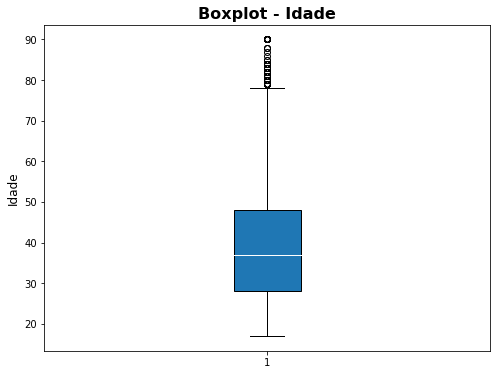

In [415]:
#9- Detecte e elimine os outliers da variável 'idade'

plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df2.idade, patch_artist = True, boxprops=dict(color='black'),medianprops=dict(color='white'))
plt.ylabel('Idade', {'fontsize': 12}) #legenda no eixo x

plt.show()

#### Pelo gráfico acima, vemos que há alguns outliers na região de 80 anos. Vamos investigá-los.

In [416]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [417]:
df2['outlier_idade'] = detecta_outlier(df2.idade)
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [418]:
df2.outlier_idade.unique()

array([0, 1])

In [419]:
df2.loc[df2.outlier_idade == 1]

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
61,79.0,10,Married-civ-spouse,White,Male,20,<=50K,1
193,90.0,9,Never-married,Black,Male,40,<=50K,1
380,80.0,9,Widowed,White,Male,24,<=50K,1
826,81.0,9,Married-civ-spouse,White,Male,30,<=50K,1
936,90.0,9,Never-married,White,Female,40,<=50K,1
...,...,...,...,...,...,...,...,...
28517,80.0,12,Married-civ-spouse,White,Male,4,<=50K,1
28535,82.0,9,Married-civ-spouse,White,Male,20,<=50K,1
28920,90.0,9,Widowed,White,Female,25,<=50K,1
28996,90.0,4,Married-civ-spouse,White,Male,40,<=50K,1


In [420]:
#Eliminando os outliers da variável idade

df2 = df2[df2.outlier_idade != 1]
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [421]:
df2.outlier_idade.unique()

array([0])

#### Vemos agora que não há mais nenhum outlier na variável idade, conforme linha acima.

In [437]:
#10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

def nam_values(df):
        
    var_categorica = []
    var_numerica = []

    #Classificando automaticamente as colunas em variável e categórica
    for v in df.columns:
        try:
            df[v].sum()/2 #Se não resultar em um erro, a coluna será do tipo numérica
            var_numerica.append(v)

        except TypeError:
            var_categorica.append(v) #Em caso de erro, será do tipo categórica

    for v in var_numerica:
        if df[v].isnull().sum() / df.shape[0] > 0.8:
            df = df.drop(v,axis=1) #Se o percentual de dados faltantes for acima de 80%, delete.
        else:
            df[v] = round(df[v].fillna(df[v].mean())) #Senão preencha com a média

    for v in var_categorica:
        if df[v].isnull().sum() / df.shape[0] > 0.8: #Se o percentual de dados faltantes for acima de 80%, delete.
                df = df.drop(v,axis=1)

        else:
            df[v] = df[v].fillna(df[v].value_counts().idxmax()) #Senão preencha com a moda
        
    return df

def MinMaxScaler(df):
    
    from sklearn.preprocessing import MinMaxScaler
    
    coluna = input('Qual coluna do DataFrame você deseja aplicar a função MinMaxScaler?')
    
    try:    
        x = df[coluna].values.reshape(-1,1)
        mm_scaler = MinMaxScaler()
        mm_scaler.fit(x) 
        coluna_tratada = mm_scaler.transform(x)

        df2 = pd.DataFrame(np.c_[coluna_tratada]).round(4) #Cria um segundo Dataframe com a coluna tratada
        df2.rename(columns = {0:coluna}, inplace= True) #Renomeia a coluna tratada com o nome original no segundo Dataframe
        df = df.drop(coluna,axis=1) #Deleta a coluna original no primeiro Dataframe
        df_final = pd.concat([df,df2], axis = 1) #Concatena amboos os Dataframes com o tratamento feito
        return df_final
    except:
        print('Não há nenhuma coluna no Dataframe conforme o nome digitado. Tente novamente com o nome correto')

def StandardScaler(df):
    
    from sklearn.preprocessing import StandardScaler
    
    coluna = input('Qual coluna do DataFrame você deseja aplicar a função StandardScaler?')
    
    try:    
        x = df[coluna].values.reshape(-1,1)
        ss_scaler = StandardScaler()
        ss_scaler.fit(x)
        coluna_tratada = ss_scaler.transform(x)

        df2 = pd.DataFrame(np.c_[coluna_tratada]).round(4) #Cria um segundo Dataframe com a coluna tratada
        df2.rename(columns = {0:coluna}, inplace= True) #Renomeia a coluna tratada com o nome original no segundo Dataframe
        df = df.drop(coluna,axis=1) #Deleta a coluna original no primeiro Dataframe
        df_final = pd.concat([df,df2], axis = 1) #Concatena amboos os Dataframes com o tratamento feito
        return df_final
    
    except:
        print('Não há nenhuma coluna no Dataframe conforme o nome digitado. Tente novamente com o nome correto')

def OneHotEncoder(df):
    
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    coluna = input('Qual coluna do DataFrame você deseja aplicar a função OneHotEncoder?')

    try:
        x = df[coluna].values.reshape(-1,1)
        ohe.fit(x)

        df2 = pd.DataFrame(ohe.transform(x).toarray(), 
                                     columns = ohe.categories_[0].tolist())
        df2.rename(columns = {0:coluna}, inplace= True)
        df = df.drop(coluna,axis=1) #Deleta a coluna original no primeiro Dataframe
        df_final = pd.concat([df,df2], axis = 1) #Concatena amboos os Dataframes com o tratamento feito
        return df_final
        
    except:
        print('Não há nenhuma coluna no Dataframe conforme o nome digitado. Tente novamente com o nome correto')

def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)


In [428]:
df2 = pd.read_csv("dataframe_exercicio_modulo_7.csv",na_values='?')
df2.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


In [429]:
#Limpando os dados nulos
df_limpo = nam_values(df=df2)

df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [430]:
#Aplicando MinMaxScaler na coluna tempo_educacao
df_limpo2 = MinMaxScaler(df=df_limpo)

df_limpo2

Qual coluna do DataFrame você deseja aplicar a função MinMaxScaler?tempo_educacao


,idade,estado_civil,cor,sexo,horas_por_semana,salario_anual,tempo_educacao
0,39.0,Never-married,White,Male,40,<=50K,0.8000
1,50.0,Married-civ-spouse,White,Male,13,<=50K,0.8000
2,38.0,Divorced,White,Male,40,<=50K,0.5333
3,53.0,Married-civ-spouse,Black,Male,40,<=50K,0.4000
4,37.0,Married-civ-spouse,White,Female,40,<=50K,0.8667
...,...,...,...,...,...,...,...
29165,27.0,Married-civ-spouse,White,Female,38,<=50K,0.7333
29166,40.0,Married-civ-spouse,White,Male,40,>50K,0.5333
29167,58.0,Widowed,White,Female,40,<=50K,0.5333
29168,22.0,Never-married,White,Male,20,<=50K,0.5333


In [431]:
#Aplicando StandardScaler na coluna horas_por_semana
df_limpo3 = StandardScaler(df=df_limpo2)

df_limpo3

Qual coluna do DataFrame você deseja aplicar a função StandardScaler?horas_por_semana


,idade,estado_civil,cor,sexo,salario_anual,tempo_educacao,horas_por_semana
0,39.0,Never-married,White,Male,<=50K,0.8000,-0.0361
1,50.0,Married-civ-spouse,White,Male,<=50K,0.8000,-2.2105
2,38.0,Divorced,White,Male,<=50K,0.5333,-0.0361
3,53.0,Married-civ-spouse,Black,Male,<=50K,0.4000,-0.0361
4,37.0,Married-civ-spouse,White,Female,<=50K,0.8667,-0.0361
...,...,...,...,...,...,...,...
29165,27.0,Married-civ-spouse,White,Female,<=50K,0.7333,-0.1971
29166,40.0,Married-civ-spouse,White,Male,>50K,0.5333,-0.0361
29167,58.0,Widowed,White,Female,<=50K,0.5333,-0.0361
29168,22.0,Never-married,White,Male,<=50K,0.5333,-1.6468


In [445]:
#Aplicando OneHotEncoder nas colunas estado_civil, cor e sexo

df_limpo4 = OneHotEncoder(df = df_limpo3)

df_limpo5 = OneHotEncoder(df = df_limpo4)

df_limpo6 = OneHotEncoder(df = df_limpo5)

df_limpo6

Qual coluna do DataFrame você deseja aplicar a função OneHotEncoder?estado_civil
Qual coluna do DataFrame você deseja aplicar a função OneHotEncoder?cor
Qual coluna do DataFrame você deseja aplicar a função OneHotEncoder?sexo


,idade,salario_anual,tempo_educacao,horas_por_semana,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,<=50K,0.8000,-0.0361,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,<=50K,0.8000,-2.2105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,<=50K,0.5333,-0.0361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,<=50K,0.4000,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,37.0,<=50K,0.8667,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,<=50K,0.7333,-0.1971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29166,40.0,>50K,0.5333,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29167,58.0,<=50K,0.5333,-0.0361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29168,22.0,<=50K,0.5333,-1.6468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [446]:
df_limpo6['outlier_idade'] = detecta_outlier(df2.idade)
df_limpo6

,idade,salario_anual,tempo_educacao,horas_por_semana,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,outlier_idade
0,39.0,<=50K,0.8000,-0.0361,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,<=50K,0.8000,-2.2105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,<=50K,0.5333,-0.0361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,<=50K,0.4000,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,<=50K,0.8667,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,<=50K,0.7333,-0.1971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29166,40.0,>50K,0.5333,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
29167,58.0,<=50K,0.5333,-0.0361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29168,22.0,<=50K,0.5333,-1.6468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [447]:
df_final = df_limpo6[df_limpo6.outlier_idade != 1]
df_final

,idade,salario_anual,tempo_educacao,horas_por_semana,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,outlier_idade
0,39.0,<=50K,0.8000,-0.0361,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,<=50K,0.8000,-2.2105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,<=50K,0.5333,-0.0361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,<=50K,0.4000,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,<=50K,0.8667,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,<=50K,0.7333,-0.1971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29166,40.0,>50K,0.5333,-0.0361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
29167,58.0,<=50K,0.5333,-0.0361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29168,22.0,<=50K,0.5333,-1.6468,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
